In [0]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import os

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


In [12]:
train_data = torchvision.datasets.ImageFolder('./drive/My Drive/overfit_data',loader = plt.imread,transform=transform)

print("Training small set: "+str(len(train_data)))

Training small set: 384


In [0]:
import torchvision.models

In [0]:
resnet_v1 = torchvision.models.resnet.ResNet(torchvision.models.resnet.BasicBlock,[2, 2, 2, 2],num_classes=32).cuda()

In [0]:
def get_train_accuracy(model,batch_size=10):
    
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)

    correct = 0
    total = 0
    
    for imgs, labels in iter(train_loader):
        model = model.cuda()
        output = model(imgs.cuda()).cuda() # We don't need to run F.softmax
        pred = output.max(1, keepdim=True)[1].cuda() # get the index of the max log-probability
        correct += pred.eq(labels.cuda().view_as(pred)).sum().item()
        total += imgs.shape[0]

        
    
    return correct / total

In [0]:
def train_net(model, batch_size=10, num_epochs=20, learning_rate = 0.0006,weight_decay=0.0002):
  
    model = model.cuda()
    model = model.train()
    start_time = time.time()
    
    torch.manual_seed(1000)
    train_loader = torch.utils.data.DataLoader(train_data, shuffle = True, batch_size=batch_size)
    criterion = nn.CrossEntropyLoss().cuda()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate,weight_decay = weight_decay)
    

    saved_train_losses, saved_val_losses, iters, train_losses, val_losses, train_acc, val_acc = [], [], [], [], [], [], []

    # training
    n = 0 # the number of iterations
    x_value = 0
    
    for epoch in range(num_epochs):

        for imgs, labels in iter(train_loader):
            
            out = model(imgs.cuda()).cuda()             # forward pass
            loss = criterion(out, labels.cuda()) # compute the total loss


            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch
            

            saved_train_losses.append(float(loss)/batch_size)

        iters.append(n)
        train_losses.append(float(loss)/batch_size)             # compute *average* loss
        
        n += 1
        
        train_acc.append(get_train_accuracy(model,batch_size=batch_size)) # compute training accuracy 


        print(("Epoch {}: Train acc: {} |"+"Train loss: {}").format(epoch + 1,train_acc[-1],train_losses[-1]))


    # plotting
    plt.title("Loss Curve")
    plt.plot(iters, train_losses, label="Train")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.xlabel("Epochs")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()
    
    end_time = time.time()
    duration = end_time - start_time

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print ("Trained Duration: {} seconds".format(duration))

Epoch 1: Train acc: 0.0625 |Train loss: 0.34219496250152587
Epoch 2: Train acc: 0.07552083333333333 |Train loss: 0.347591757774353
Epoch 3: Train acc: 0.07552083333333333 |Train loss: 0.2790523052215576
Epoch 4: Train acc: 0.06770833333333333 |Train loss: 0.285913348197937
Epoch 5: Train acc: 0.08854166666666667 |Train loss: 0.3183863162994385
Epoch 6: Train acc: 0.0625 |Train loss: 0.22709064483642577
Epoch 7: Train acc: 0.059895833333333336 |Train loss: 0.33184494972229006
Epoch 8: Train acc: 0.078125 |Train loss: 0.320098352432251
Epoch 9: Train acc: 0.06510416666666667 |Train loss: 0.25396273136138914
Epoch 10: Train acc: 0.059895833333333336 |Train loss: 0.32063229084014894
Epoch 11: Train acc: 0.07291666666666667 |Train loss: 0.2671170234680176
Epoch 12: Train acc: 0.10677083333333333 |Train loss: 0.28160710334777833
Epoch 13: Train acc: 0.07552083333333333 |Train loss: 0.28223624229431155
Epoch 14: Train acc: 0.07291666666666667 |Train loss: 0.37832069396972656
Epoch 15: Train a

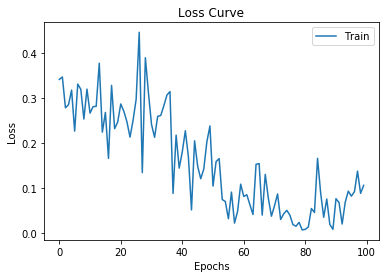

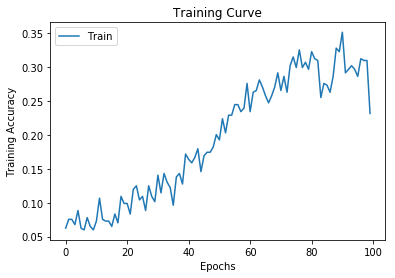

Final Training Accuracy: 0.23177083333333334


IndexError: ignored

In [0]:
train_net(resnet_v1,batch_size=10, num_epochs=100, learning_rate = 0.0006,weight_decay=0.0002)

Epoch 1: Train acc: 0.020833333333333332 |Train loss: 0.1336876392364502
Epoch 2: Train acc: 0.041666666666666664 |Train loss: 0.0689989423751831
Epoch 3: Train acc: 0.0390625 |Train loss: 0.0732512617111206
Epoch 4: Train acc: 0.041666666666666664 |Train loss: 0.06722035884857178
Epoch 5: Train acc: 0.057291666666666664 |Train loss: 0.06856327056884766
Epoch 6: Train acc: 0.036458333333333336 |Train loss: 0.06956142902374268
Epoch 7: Train acc: 0.041666666666666664 |Train loss: 0.07079699039459228
Epoch 8: Train acc: 0.044270833333333336 |Train loss: 0.06582790374755859
Epoch 9: Train acc: 0.06510416666666667 |Train loss: 0.06750362873077392
Epoch 10: Train acc: 0.0625 |Train loss: 0.07050496578216553
Epoch 11: Train acc: 0.0546875 |Train loss: 0.0695882797241211
Epoch 12: Train acc: 0.06510416666666667 |Train loss: 0.06876226902008056
Epoch 13: Train acc: 0.033854166666666664 |Train loss: 0.06671244621276856
Epoch 14: Train acc: 0.0703125 |Train loss: 0.06434335708618164
Epoch 15: Tr

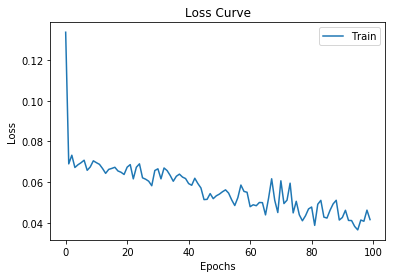

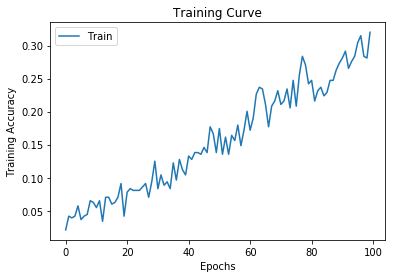

Final Training Accuracy: 0.3203125


IndexError: ignored

In [0]:
resnet_v2 = torchvision.models.resnet.ResNet(torchvision.models.resnet.BasicBlock,[2, 2, 2, 2],num_classes=32).cuda()
train_net(resnet_v2,batch_size=50, num_epochs=100, learning_rate = 0.06,weight_decay=0.0002)

Epoch 1: Train acc: 0.07291666666666667 |Train loss: 0.11736302077770233
Epoch 2: Train acc: 0.07291666666666667 |Train loss: 0.10856831818819046
Epoch 3: Train acc: 0.078125 |Train loss: 0.11186917871236801
Epoch 4: Train acc: 0.07552083333333333 |Train loss: 0.0991656556725502
Epoch 5: Train acc: 0.1171875 |Train loss: 0.1039622351527214
Epoch 6: Train acc: 0.13020833333333334 |Train loss: 0.08693285286426544
Epoch 7: Train acc: 0.109375 |Train loss: 0.09396982938051224
Epoch 8: Train acc: 0.08072916666666667 |Train loss: 0.08614159375429153
Epoch 9: Train acc: 0.11197916666666667 |Train loss: 0.09222922474145889
Epoch 10: Train acc: 0.10677083333333333 |Train loss: 0.08755180239677429
Epoch 11: Train acc: 0.12760416666666666 |Train loss: 0.09107347577810287
Epoch 12: Train acc: 0.1171875 |Train loss: 0.09180140495300293
Epoch 13: Train acc: 0.09635416666666667 |Train loss: 0.08573006838560104
Epoch 14: Train acc: 0.13020833333333334 |Train loss: 0.0866711437702179
Epoch 15: Train ac

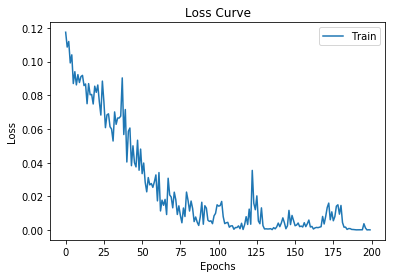

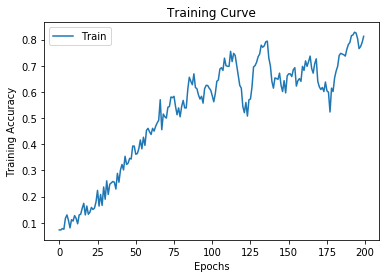

Final Training Accuracy: 0.8125
Trained Duration: 1317.4329948425293 seconds


In [0]:
resnet_v3 = torchvision.models.resnet.ResNet(torchvision.models.resnet.BasicBlock,[2, 2, 2, 2],num_classes=32).cuda()
train_net(resnet_v3,batch_size=32, num_epochs=200, learning_rate = 0.006,weight_decay=0.0002)

In [0]:
res50_v1 = torchvision.models.resnet.ResNet(torchvision.models.resnet.Bottleneck,[3, 4, 6, 3],num_classes=32).cuda()
train_net(res50_v1,batch_size=32, num_epochs=200, learning_rate = 0.006,weight_decay=0.0002)

Epoch 1: Train acc: 0.028645833333333332 |Train loss: 0.18198741972446442
Epoch 2: Train acc: 0.052083333333333336 |Train loss: 0.10945172607898712
Epoch 3: Train acc: 0.041666666666666664 |Train loss: 0.11171552538871765
Epoch 4: Train acc: 0.049479166666666664 |Train loss: 0.11141804605722427
Epoch 5: Train acc: 0.049479166666666664 |Train loss: 0.10859004408121109
Epoch 6: Train acc: 0.057291666666666664 |Train loss: 0.10623610764741898
Epoch 7: Train acc: 0.06770833333333333 |Train loss: 0.10848329961299896
Epoch 8: Train acc: 0.07552083333333333 |Train loss: 0.10650049895048141
Epoch 9: Train acc: 0.0703125 |Train loss: 0.1033431738615036
Epoch 10: Train acc: 0.049479166666666664 |Train loss: 0.09558127075433731
Epoch 11: Train acc: 0.07291666666666667 |Train loss: 0.10084685683250427
Epoch 12: Train acc: 0.078125 |Train loss: 0.09547928720712662
Epoch 13: Train acc: 0.1015625 |Train loss: 0.0950893834233284
Epoch 14: Train acc: 0.07552083333333333 |Train loss: 0.09926415979862213